# Importing Library

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("Salaries.csv")

In [31]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [33]:
print(df.shape)
df.describe()

(397, 6)


,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [34]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

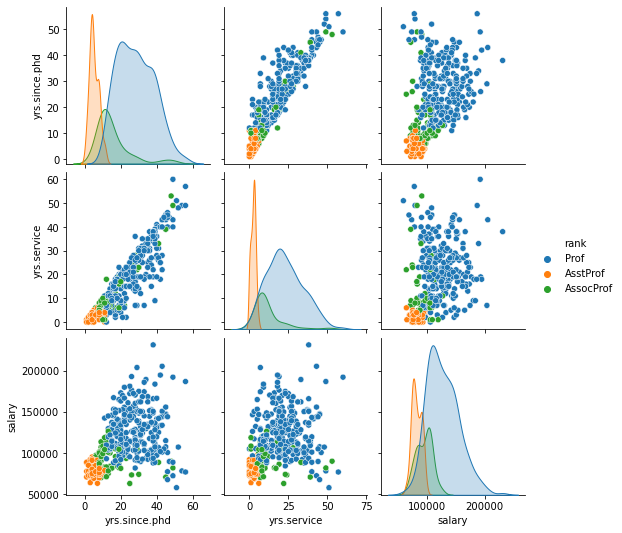

In [36]:
sns.pairplot(df,hue='rank')

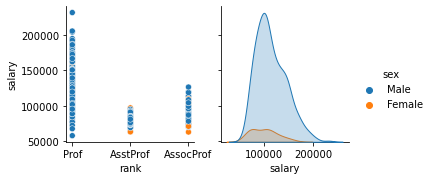

In [40]:
sns.pairplot(df,x_vars=['rank','salary'],y_vars=['salary'],hue='sex')

In [41]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

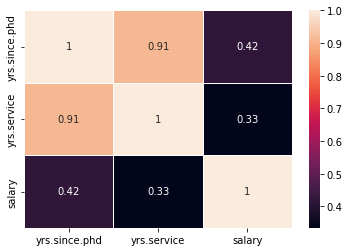

In [42]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [50]:
X = df[['sex', 'yrs.service', 'rank', 'discipline']]

In [51]:
X = pd.get_dummies(data=X)
X.head()

,yrs.service,sex_Female,sex_Male,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B
0,18,0,1,0,0,1,0,1
1,16,0,1,0,0,1,0,1
2,3,0,1,0,1,0,0,1
3,39,0,1,0,0,1,0,1
4,41,0,1,0,0,1,0,1


In [52]:
Y = df['salary']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297, 8)
(100, 8)
(297,)
(100,)


In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
print(model.intercept_)

97573.72834034766


In [73]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
yrs.service,39.134207
sex_Female,-1854.041248
sex_Male,1854.041248
rank_AssocProf,-7313.413384
rank_AsstProf,-20515.553290
rank_Prof,27828.966673
discipline_A,-7648.095806
discipline_B,7648.095806


In [74]:
predictions = model.predict(X_test)
predictions

array([115900.55795961, 120313.0561867 ,  67790.84324056, 100075.52566928,
       135648.38200652,  86599.44631195, 136235.39511623,  86560.31210464,
        96445.71158846, 116448.436862  , 131901.16530377, 121017.47191834,
       135804.91883578, 134983.10048219, 120821.80088177, 100075.52566928,
       135961.45566503,  67673.44061862, 121604.48502804,  86716.84893389,
       135022.23468951, 120508.72722326, 136352.79773817, 135609.24779921,
        84857.60247139, 120039.1167355 ,  86599.44631195,  86638.58051927,
       116644.10789857, 120039.1167355 , 131901.16530377, 131588.09164526,
       135804.91883578, 135726.65042115, 135648.38200652, 136117.99249428,
       121369.67978416, 135687.51621384, 135530.97938458, 121839.29027192,
       119921.71411356, 120352.19039401,  99958.12304734, 119960.84832087,
       132214.23896228, 135022.23468951, 135687.51621384, 136000.58987234,
       136665.87139667, 135687.51621384, 120313.0561867 , 100114.65987659,
       119882.57990625,  

<AxesSubplot:xlabel='salary'>

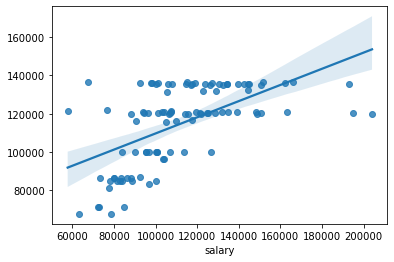

In [75]:
sns.regplot(y_test,predictions)

In [76]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     53.63
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           2.41e-39
Time:                        00:23:34   Log-Likelihood:                -3395.1
No. Observations:                 297   AIC:                             6802.
Df Residuals:                     291   BIC:                             6824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.182e+04   1243.684     33.

In [77]:
from sklearn.metrics import r2_score
print("Accuracy of model is", round((r2_score(y_test, predictions)*100), 2), "%")

Accuracy of model is 31.33 %


In [100]:
def model_new(test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    return "Accuracy of model is", round((r2_score(y_test, predictions)*100), 2), "%"

('Accuracy of model is', 45.44, '%')

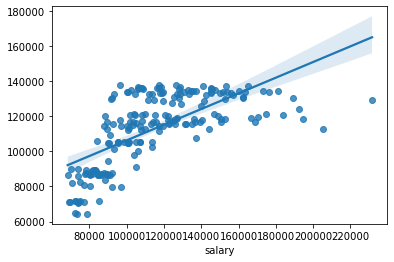

In [101]:
model_new(0.5, 101)

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [103]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

In [105]:
x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [106]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', round(error,3), "Accuracy = ", round((r2_score(y_test, pred)*100), 2), "%")

RMSE value for k=  1 is: 29147.939 Accuracy =  -7.56 %
RMSE value for k=  2 is: 27789.796 Accuracy =  2.23 %
RMSE value for k=  3 is: 25252.891 Accuracy =  19.26 %
RMSE value for k=  4 is: 25473.081 Accuracy =  17.85 %
RMSE value for k=  5 is: 24655.863 Accuracy =  23.03 %
RMSE value for k=  6 is: 24052.576 Accuracy =  26.76 %
RMSE value for k=  7 is: 24265.253 Accuracy =  25.45 %
RMSE value for k=  8 is: 24737.711 Accuracy =  22.52 %
RMSE value for k=  9 is: 25134.145 Accuracy =  20.02 %
RMSE value for k=  10 is: 24782.445 Accuracy =  22.24 %
RMSE value for k=  11 is: 24722.466 Accuracy =  22.62 %
RMSE value for k=  12 is: 24945.177 Accuracy =  21.22 %
RMSE value for k=  13 is: 24565.707 Accuracy =  23.6 %
RMSE value for k=  14 is: 24947.633 Accuracy =  21.2 %
RMSE value for k=  15 is: 25186.962 Accuracy =  19.68 %
RMSE value for k=  16 is: 25171.149 Accuracy =  19.78 %
RMSE value for k=  17 is: 25354.478 Accuracy =  18.61 %
RMSE value for k=  18 is: 25119.438 Accuracy =  20.11 %
RMSE